In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
sales_df = pd.read_csv('data_sets/sales_data.csv')

In [5]:
sales_df.head()

,order_id,date,customer_id,product,quantity,price,region
0,1,2023-01-15,C001,Widget A,5,10.0,North
1,2,2023-01-17,C002,Widget B,3,15.0,South
2,3,2023-02-20,C001,Widget A,2,10.0,North
3,4,2023-03-05,C003,Widget C,4,20.0,East
4,5,2023-03-10,C004,Widget B,1,15.0,West


In [6]:
customer_df = pd.read_csv('data_sets/customers.csv')

In [7]:
customer_df.head()

,customer_id,customer_name
0,C001,Alice Johnson
1,C002,Bob Smith
2,C003,Charlie Brown
3,C004,Dana White
4,C005,Eva Green


In [8]:
# Checking for the missing values 
sales_df[sales_df.isna().any(axis=1)]

,order_id,date,customer_id,product,quantity,price,region


In [9]:
customer_df[customer_df.isna().any(axis=1)]

,customer_id,customer_name


In [10]:
sales_df.isna()

,order_id,date,customer_id,product,quantity,price,region
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [11]:
sales_df.head()

,order_id,date,customer_id,product,quantity,price,region
0,1,2023-01-15,C001,Widget A,5,10.0,North
1,2,2023-01-17,C002,Widget B,3,15.0,South
2,3,2023-02-20,C001,Widget A,2,10.0,North
3,4,2023-03-05,C003,Widget C,4,20.0,East
4,5,2023-03-10,C004,Widget B,1,15.0,West


In [12]:
sales_df['Total_sales_per_product'] = sales_df['quantity'] * sales_df['price']

In [15]:
sales_df = sales_df.sort_values(by='Total_sales_per_product', ascending=False)

In [16]:
sales_df[['quantity', 'price','Total_sales_per_product']]

,quantity,price,Total_sales_per_product
10,7,15.0,105.0
5,5,20.0,100.0
7,6,15.0,90.0
3,4,20.0,80.0
0,5,10.0,50.0
1,3,15.0,45.0
8,4,10.0,40.0
9,2,20.0,40.0
6,3,10.0,30.0
2,2,10.0,20.0


In [17]:
sales_df.head()

,order_id,date,customer_id,product,quantity,price,region,Total_sales_per_product
10,11,2023-09-10,C002,Widget B,7,15.0,South,105.0
5,6,2023-04-12,C001,Widget C,5,20.0,North,100.0
7,8,2023-06-18,C005,Widget B,6,15.0,East,90.0
3,4,2023-03-05,C003,Widget C,4,20.0,East,80.0
0,1,2023-01-15,C001,Widget A,5,10.0,North,50.0


In [24]:
top_5_customers = sales_df.sort_values(by='Total_sales_per_product', ascending=False).head(5)

In [25]:
top_5_customers

,order_id,date,customer_id,product,quantity,price,region,Total_sales_per_product
10,11,2023-09-10,C002,Widget B,7,15.0,South,105.0
5,6,2023-04-12,C001,Widget C,5,20.0,North,100.0
7,8,2023-06-18,C005,Widget B,6,15.0,East,90.0
3,4,2023-03-05,C003,Widget C,4,20.0,East,80.0
0,1,2023-01-15,C001,Widget A,5,10.0,North,50.0


In [26]:
# converting date column to datetype 
sales_df['date'] = pd.to_datetime(sales_df['date'])

In [30]:
sales_df['month'] = sales_df['date'].dt.month

In [31]:
sales_df.head(2)

,order_id,date,customer_id,product,quantity,price,region,Total_sales_per_product,month
10,11,2023-09-10,C002,Widget B,7,15.0,South,105.0,9
5,6,2023-04-12,C001,Widget C,5,20.0,North,100.0,4


In [34]:
sales_df['region'].unique()

array(['South', 'North', 'East', 'West'], dtype=object)

In [32]:
region_sales = sales_df.groupby('region')['Total_sales_per_product'].sum().reset_index()

In [33]:
region_sales

,region,Total_sales_per_product
0,East,210.0
1,North,180.0
2,South,180.0
3,West,55.0


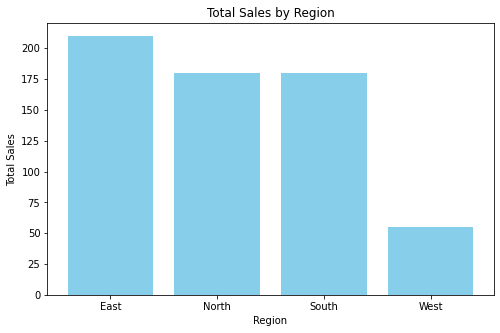

In [36]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(region_sales['region'], region_sales['Total_sales_per_product'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.show()

In [37]:
customer_df.head()

,customer_id,customer_name
0,C001,Alice Johnson
1,C002,Bob Smith
2,C003,Charlie Brown
3,C004,Dana White
4,C005,Eva Green


In [39]:
merged_df = pd.merge(sales_df, customer_df, on='customer_id', how='left')

In [40]:
merged_df.head()

,order_id,date,customer_id,product,quantity,price,region,Total_sales_per_product,month,customer_name
0,11,2023-09-10,C002,Widget B,7,15.0,South,105.0,9,Bob Smith
1,6,2023-04-12,C001,Widget C,5,20.0,North,100.0,4,Alice Johnson
2,8,2023-06-18,C005,Widget B,6,15.0,East,90.0,6,Eva Green
3,4,2023-03-05,C003,Widget C,4,20.0,East,80.0,3,Charlie Brown
4,1,2023-01-15,C001,Widget A,5,10.0,North,50.0,1,Alice Johnson


### TASK 2

In [41]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options as FirefoxOptions
import json
import time

# Setup Firefox options
options = FirefoxOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")

# Initialize the WebDriver with Service
driver = webdriver.Firefox(executable_path="D:\Setups\geckodriver.exe")
# URL to scrape
url = "https://quotes.toscrape.com/"

# List to store scraped data
data_list = []

try:
    # Open the URL
    driver.get(url)
    time.sleep(2)  # Wait for the page to load

    # Find all quote elements on the page
    quotes = driver.find_elements(By.CLASS_NAME, "quote")

    # Extract and store each quote, author, and tags
    for quote in quotes:
        quote_text = quote.find_element(By.CLASS_NAME, "text").text
        author = quote.find_element(By.CLASS_NAME, "author").text
        tags_elements = quote.find_elements(By.CLASS_NAME, "tag")
        tags = [tag.text for tag in tags_elements]  

        # Create a dictionary for the quote and append it to the list
        quote_dict = {
            "quote": quote_text,
            "author": author,
            "tags": tags
        }
        data_list.append(quote_dict)

finally:
    # Close the WebDriver
    driver.quit()

# Output the data in a clear, structured format (JSON)
output_data = json.dumps(data_list, indent=4)
print(output_data)


[
    {
        "quote": "\u201cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\u201d",
        "author": "Albert Einstein",
        "tags": [
            "change",
            "deep-thoughts",
            "thinking",
            "world"
        ]
    },
    {
        "quote": "\u201cIt is our choices, Harry, that show what we truly are, far more than our abilities.\u201d",
        "author": "J.K. Rowling",
        "tags": [
            "abilities",
            "choices"
        ]
    },
    {
        "quote": "\u201cThere are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.\u201d",
        "author": "Albert Einstein",
        "tags": [
            "inspirational",
            "life",
            "live",
            "miracle",
            "miracles"
        ]
    },
    {
        "quote": "\u201cThe person, be it gentleman or lady, who has not pleasur